In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torchvision.models import resnet101
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = datasets.SVHN(root='./data', split='train', download=True, transform=transform)
test_dataset = datasets.SVHN(root='./data', split='test', download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

100%|██████████| 182040794/182040794 [00:02<00:00, 74476552.01it/s] 


100%|██████████| 64275384/64275384 [00:02<00:00, 29106969.75it/s]


In [ ]:
# MODEL
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = resnet101(pretrained=True)

for param in model.parameters():
    param.requires_grad = False

num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 10)  # 10 classes in SVHN
model = model.to(device)

criterion = nn.CrossEntropyLoss()

# optimizers
optimizers = {
    'Adam': optim.Adam(model.parameters(), lr=0.001),
    'Adagrad': optim.Adagrad(model.parameters(), lr=0.001),
    'RMSprop': optim.RMSprop(model.parameters(), lr=0.001)
}

Optimizer: Adam, Epoch [1/5], Loss: 1.8346, Accuracy: 36.05%
Optimizer: Adam, Epoch [2/5], Loss: 1.7075, Accuracy: 40.95%
Optimizer: Adam, Epoch [3/5], Loss: 1.6701, Accuracy: 42.59%
Optimizer: Adam, Epoch [4/5], Loss: 1.6378, Accuracy: 43.62%
Optimizer: Adam, Epoch [5/5], Loss: 1.6189, Accuracy: 44.26%


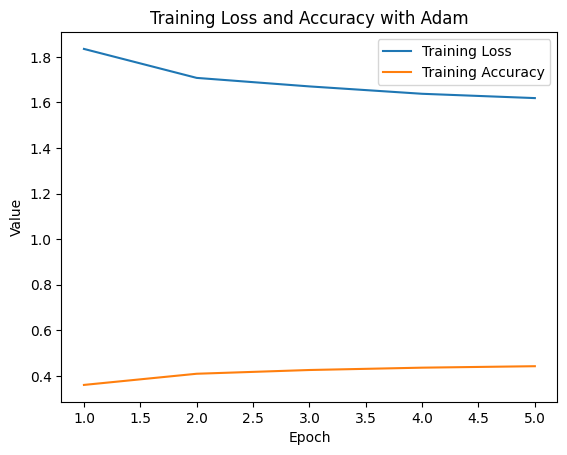

Optimizer: Adagrad, Epoch [1/5], Loss: 1.5320, Accuracy: 47.72%
Optimizer: Adagrad, Epoch [2/5], Loss: 1.5247, Accuracy: 48.03%
Optimizer: Adagrad, Epoch [3/5], Loss: 1.5212, Accuracy: 48.24%
Optimizer: Adagrad, Epoch [4/5], Loss: 1.5206, Accuracy: 48.35%
Optimizer: Adagrad, Epoch [5/5], Loss: 1.5230, Accuracy: 48.09%


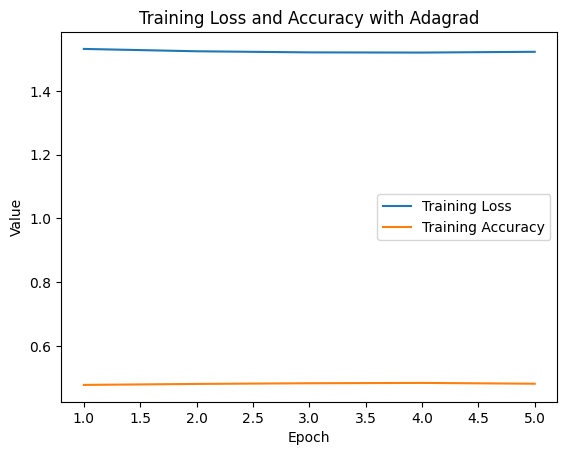

Optimizer: RMSprop, Epoch [1/5], Loss: 1.7021, Accuracy: 42.49%
Optimizer: RMSprop, Epoch [2/5], Loss: 1.6543, Accuracy: 43.20%
Optimizer: RMSprop, Epoch [3/5], Loss: 1.6441, Accuracy: 43.70%
Optimizer: RMSprop, Epoch [4/5], Loss: 1.6363, Accuracy: 43.98%


In [ ]:
for optimizer_name, optimizer in optimizers.items():
    train_loss = []
    train_accuracy = []

    model.train()
    for epoch in range(5):
        running_loss = 0.0
        correct = 0
        total = 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()

            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

        epoch_loss = running_loss / len(train_loader)
        epoch_accuracy = correct / total

        train_loss.append(epoch_loss)
        train_accuracy.append(epoch_accuracy)

        print(f'Optimizer: {optimizer_name}, Epoch [{epoch + 1}/5], Loss: {epoch_loss:.4f}, Accuracy: {100 * epoch_accuracy:.2f}%')

    # training loss and accuracy curves
    plt.plot(range(1, 6), train_loss, label='Training Loss')
    plt.plot(range(1, 6), train_accuracy, label='Training Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.title(f'Training Loss and Accuracy with {optimizer_name}')
    plt.legend()
    plt.show()

In [ ]:
# Evaluate the final model on test set
model.eval()
correct_top1 = 0
correct_top5 = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = outputs.topk(5, 1, largest=True, sorted=True)
        total += labels.size(0)
        labels = labels.view(-1, 1)
        correct_top1 += predicted[:, 0].eq(labels).sum().item()
        correct_top5 += predicted.eq(labels).sum().item()

top1_accuracy = 100 * correct_top1 / total
top5_accuracy = 100 * correct_top5 / total
print(f'Final Top-1 Test Accuracy: {top1_accuracy:.2f}%')
print(f'Final Top-5 Test Accuracy: {top5_accuracy:.2f}%')

Final Top-1 Test Accuracy: 885.76%
Final Top-5 Test Accuracy: 88.32%


In [ ]:
print("version 1 specific changes")